<a href="https://colab.research.google.com/github/oleksandragolub/Progetto-Machine-Learning/blob/main/progetto_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("caricamento di librerie")
print("Pandas, NumPy per la gestione dei dati")
print("Matplotlib, Seaborn per la visualizzazione dei dati")
print("Scikit-learn per la modellazione e la valutazione dei modelli di ML")

!pip install kagglehub
!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

caricamento di librerie
Pandas, NumPy per la gestione dei dati
Matplotlib, Seaborn per la visualizzazione dei dati
Scikit-learn per la modellazione e la valutazione dei modelli di ML


In [ ]:
dataset_path = kagglehub.dataset_download("lara311/diabetes-dataset-using-many-medical-metrics")

print("Il dataset è stato scaricato in:", dataset_path)

dataset_path = "/root/.cache/kagglehub/datasets/lara311/diabetes-dataset-using-many-medical-metrics/versions/1"

# Lista dei file nel dataset
print(os.listdir(dataset_path))

df = pd.read_csv(dataset_path + "/diabetes (1).csv")

Il dataset è stato scaricato in: /root/.cache/kagglehub/datasets/lara311/diabetes-dataset-using-many-medical-metrics/versions/1
['diabetes (1).csv']


In [ ]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Mostra le prime righe del dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Controllare se il dataset è bilanciato
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


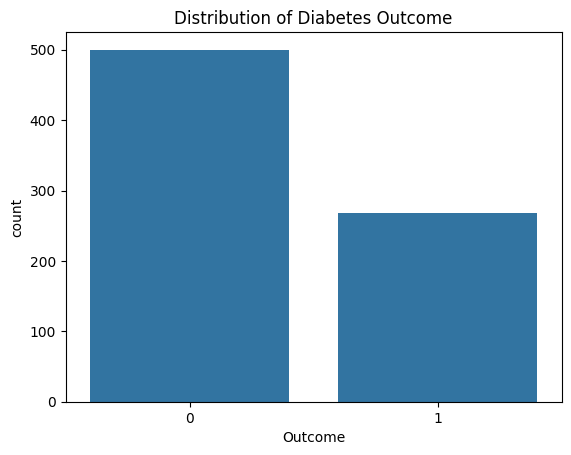

In [ ]:
# Visualize the distribution of the target variable
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.show()

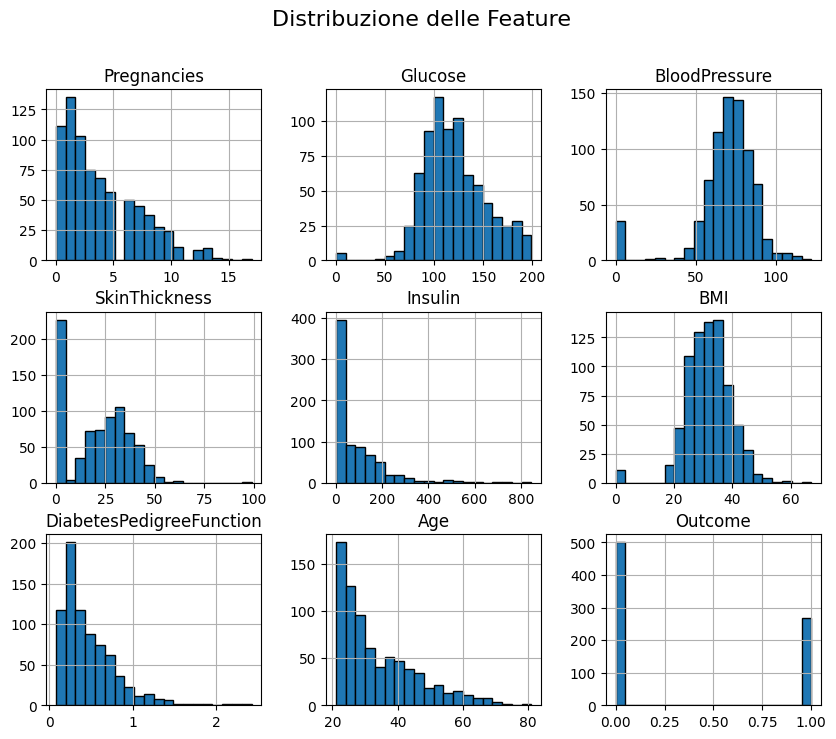

In [ ]:
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distribuzione delle Feature', fontsize=16)
plt.show()

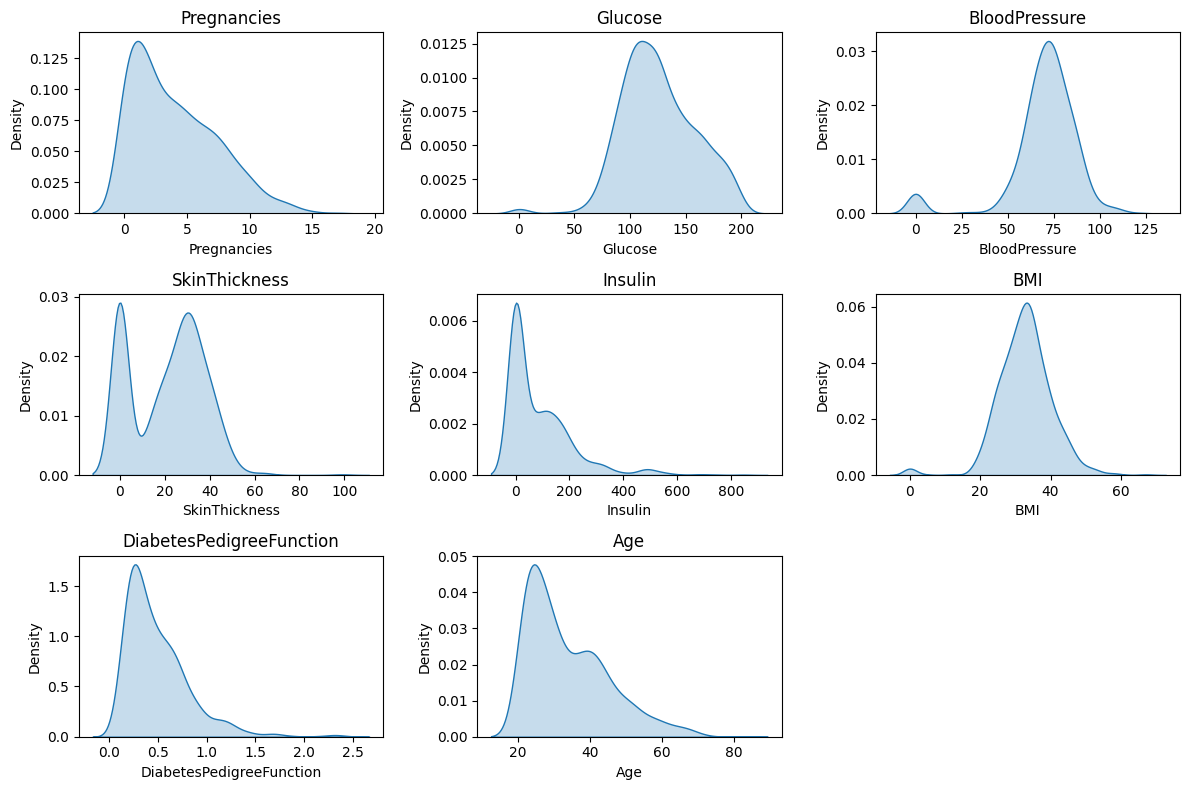

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_resampled.columns):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data=X_resampled, x=col, fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()


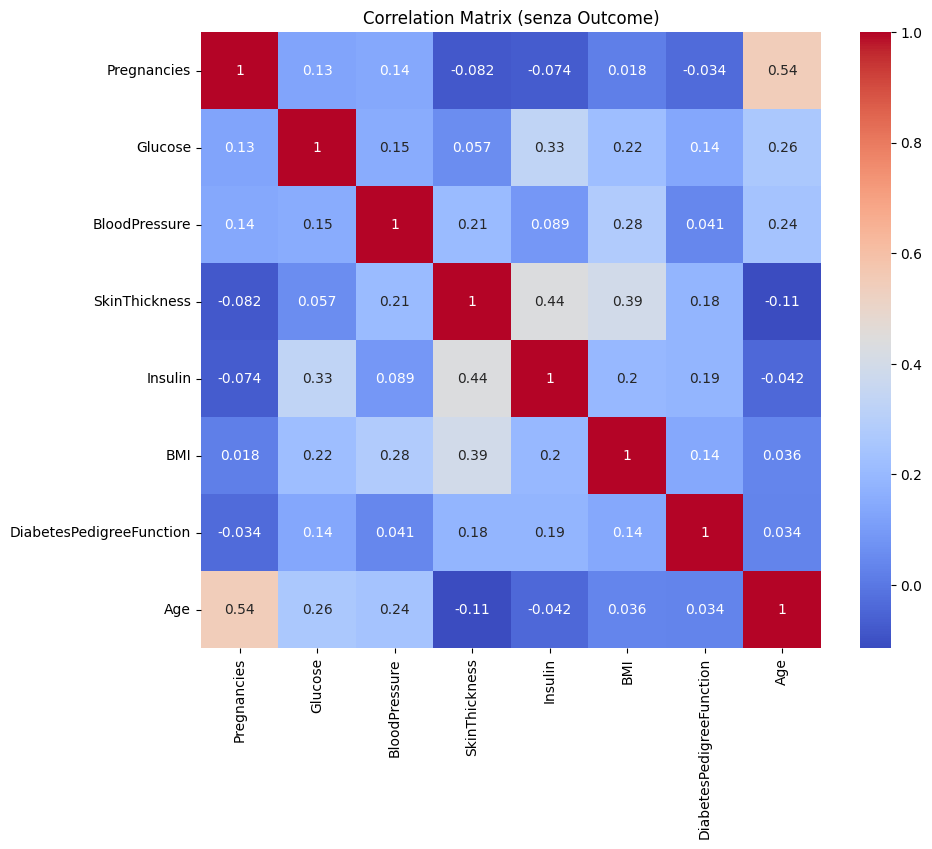

In [ ]:
# Visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=["Outcome"]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (senza Outcome)')
plt.show()

In [ ]:
# Separare le feature (X) e il target (y)
X = df.drop(columns=["Outcome"])  # Rimuove la colonna target e lascia solo le feature
y = df["Outcome"]  # La colonna target

# Applicare SMOTE per bilanciare il dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Controllare la nuova distribuzione delle classi
print(y_resampled.value_counts())  # Ora le classi dovrebbero essere bilanciate

# Dopo SMOTE, i dati bilanciati sono X_resampled e y_resampled

Outcome
1    500
0    500
Name: count, dtype: int64


In [ ]:
# Dataset information
pd.DataFrame(X_resampled, columns=X.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   int64  
 2   BloodPressure             1000 non-null   int64  
 3   SkinThickness             1000 non-null   int64  
 4   Insulin                   1000 non-null   int64  
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


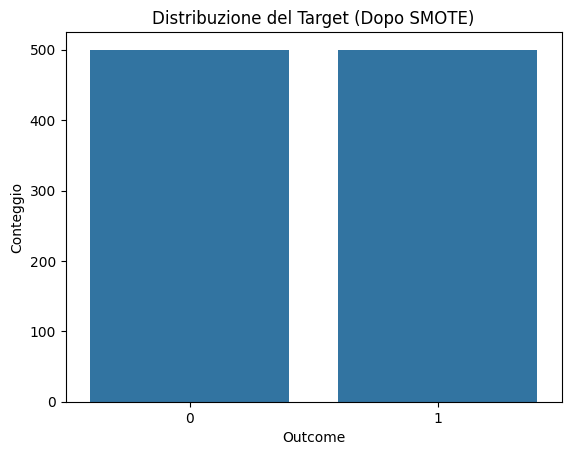

In [ ]:
# Visualizzare la distribuzione del target bilanciato (y_resampled)
sns.countplot(x=pd.DataFrame(y_resampled, columns=["Outcome"])["Outcome"])
plt.title('Distribuzione del Target (Dopo SMOTE)')
plt.xlabel('Outcome')
plt.ylabel('Conteggio')
plt.show()

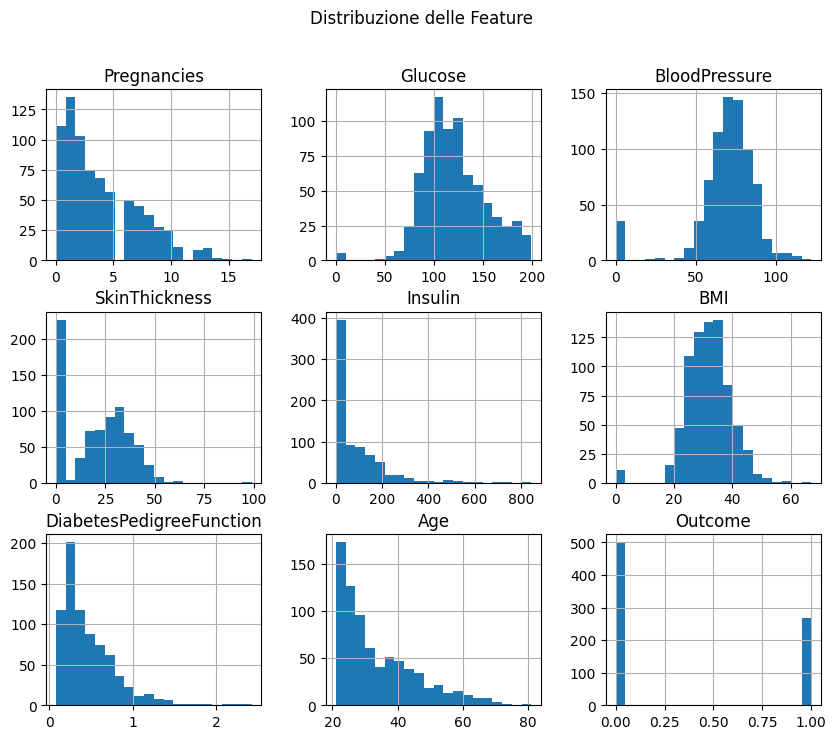

In [ ]:
# Statistical summary
df.hist(figsize=(10, 8), bins=20)
plt.suptitle('Distribuzione delle Feature')
plt.show()

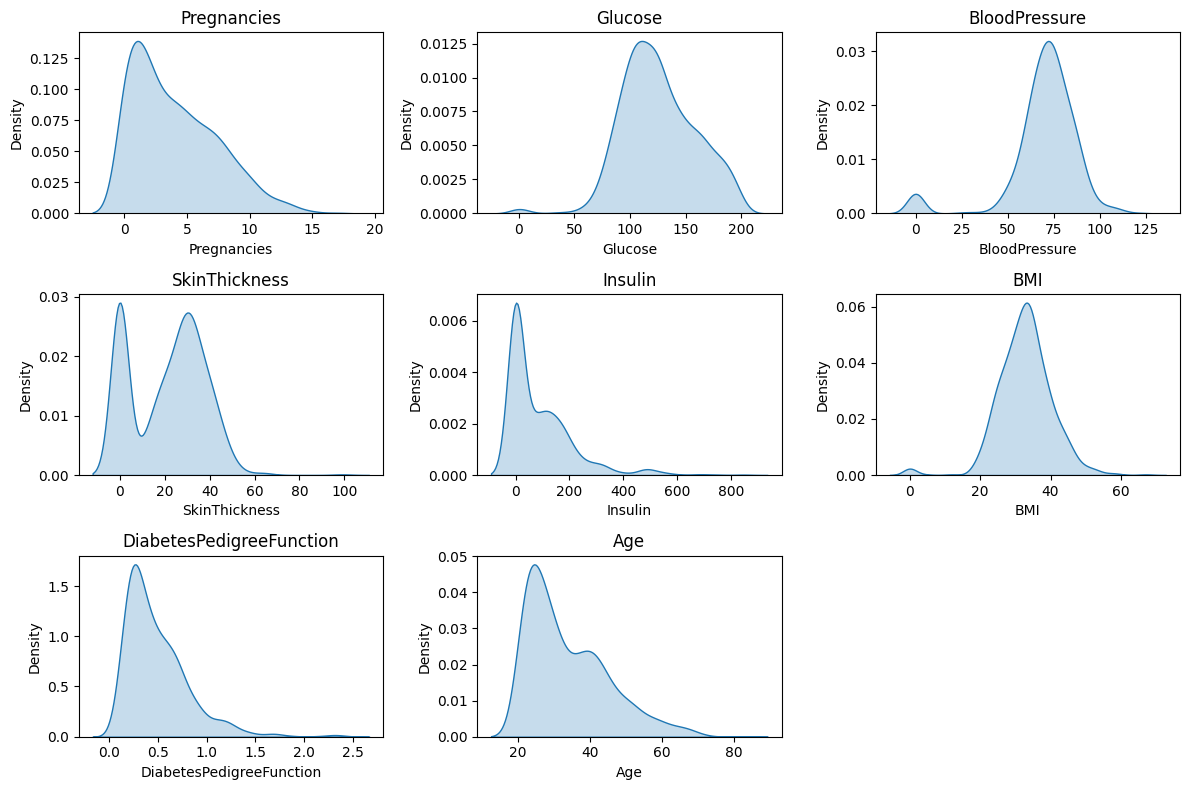

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_resampled.columns):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data=pd.DataFrame(X_resampled, columns=X.columns), x=col, fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()

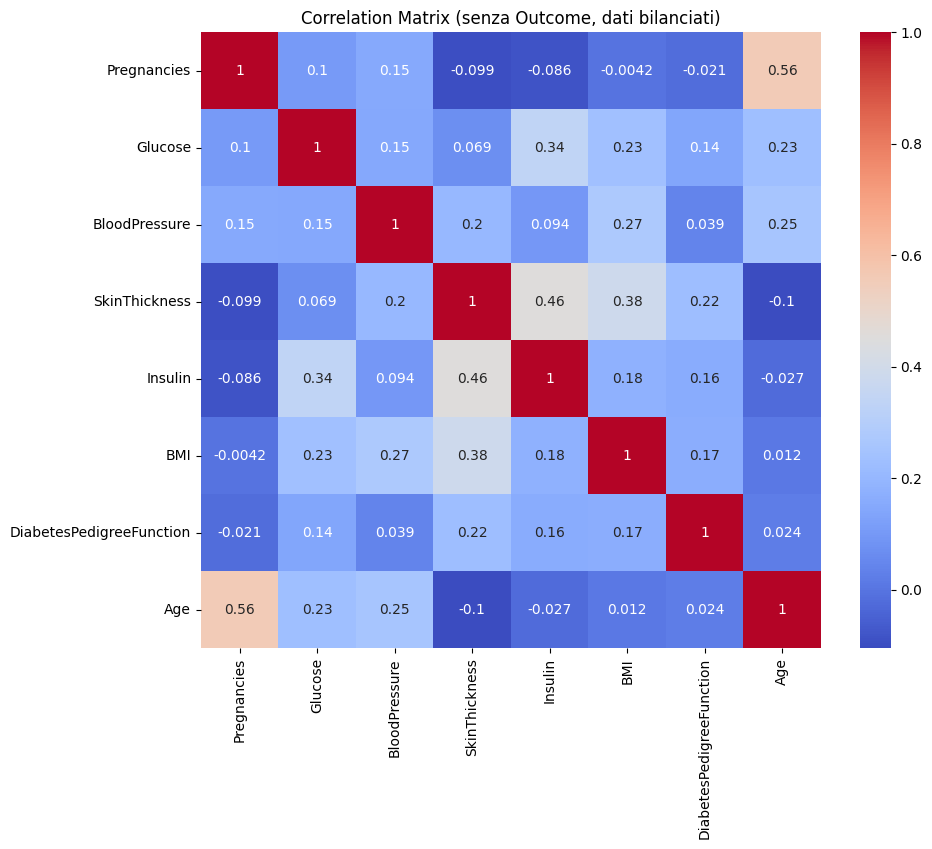

In [ ]:
# Analizza solo i dati bilanciati, che saranno effettivamente usati nel training.

plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_resampled, columns=X.columns).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (senza Outcome, dati bilanciati)')
plt.show()

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [86]:
# Feature and target separation
x = X_resampled
y = y_resampled

In [ ]:
# Scaling the features
# normalizza i dati per evitare problemi di scale diverse tra le feature
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# una prova

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Dividi i dati bilanciati in training e test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Addestrare il modello
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predire e valutare
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

NameError: name 'X_resampled' is not defined